In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib .pyplot as plt
import seaborn as sns

nba_2023 = pd.read_csv('nba_2023.csv')
nba_2023

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Awards,Player-additional,Season Type,PER,Adjusted Salary
0,1,Joel Embiid,28,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.0,1.7,3.4,3.1,33.1,MVP-1DPOY-9CPOY-5ASNBA1,embiijo01,Regular,31.4,35605377.25
1,2,Luka Dončić,23,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,1.4,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1,doncilu01,Regular,28.7,39290951.43
2,3,Damian Lillard,32,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.9,0.3,3.3,1.9,32.2,CPOY-10ASNBA3,lillada01,Regular,26.7,45006144.50
3,4,Shai Gilgeous-Alexander,24,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,1.6,1.0,2.8,2.8,31.4,MVP-5CPOY-7ASNBA1,gilgesh01,Regular,27.2,32742459.52
4,5,Giannis Antetokounmpo,28,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,0.8,0.8,3.9,3.1,31.1,MVP-3DPOY-6ASNBA1,antetgi01,Regular,29.0,45006144.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,213,Wendell Moore Jr.,21,MIN,SG,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,Unknown,moorewe01,Playoff,-26.6,4699471.69
892,214,Jason Preston,23,LAC,PG,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Unknown,prestja01,Playoff,0.0,1656008.24
893,215,Derrick Rose,34,NYK,PG,1.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,Unknown,rosede01,Playoff,-43.9,15379706.90
894,216,Ricky Rubio,32,CLE,PG,3.0,0.0,5.7,0.0,0.3,...,0.3,0.0,1.7,1.7,0.0,Unknown,rubiori01,Playoff,-6.5,6199933.46


In [3]:
nba_2023.isnull().sum()

Rk                   0
Player               0
Age                  0
Team                 0
Pos                  0
G                    0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Awards               0
Player-additional    0
Season Type          0
PER                  0
Adjusted Salary      0
dtype: int64

In [4]:
nba_2023.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'Player-additional', 'Season Type', 'PER', 'Adjusted Salary'],
      dtype='object')

In [5]:
# Check unique values in the 'Season Type' column
print(nba_2023['Season Type'].unique())


['Regular' 'Playoff']


In [6]:
# filter data to show only regular season stats
regular_nba_2023 = nba_2023[nba_2023['Season Type'] == 'Regular']

# check the first few rows of the filtered data
print(regular_nba_2023.head())


   Rk                   Player  Age Team Pos     G    GS    MP    FG   FGA  \
0   1              Joel Embiid   28  PHI   C  66.0  66.0  34.6  11.0  20.1   
1   2              Luka Dončić   23  DAL  PG  66.0  66.0  36.2  10.9  22.0   
2   3           Damian Lillard   32  POR  PG  58.0  58.0  36.3   9.6  20.7   
3   4  Shai Gilgeous-Alexander   24  OKC  PG  68.0  68.0  35.5  10.4  20.3   
4   5    Giannis Antetokounmpo   28  MIL  PF  63.0  63.0  32.1  11.2  20.3   

   ...  STL  BLK  TOV   PF   PTS                   Awards  Player-additional  \
0  ...  1.0  1.7  3.4  3.1  33.1  MVP-1DPOY-9CPOY-5ASNBA1          embiijo01   
1  ...  1.4  0.5  3.6  2.5  32.4        MVP-8CPOY-8ASNBA1          doncilu01   
2  ...  0.9  0.3  3.3  1.9  32.2            CPOY-10ASNBA3          lillada01   
3  ...  1.6  1.0  2.8  2.8  31.4        MVP-5CPOY-7ASNBA1          gilgesh01   
4  ...  0.8  0.8  3.9  3.1  31.1        MVP-3DPOY-6ASNBA1          antetgi01   

   Season Type   PER  Adjusted Salary  
0      Reg

In [7]:
# get the top 50 ranked players 
nba_2023[['Rk', 'Player']]
top50 = nba_2023[['Rk', 'Player']]
top50

,Rk,Player
0,1,Joel Embiid
1,2,Luka Dončić
2,3,Damian Lillard
3,4,Shai Gilgeous-Alexander
4,5,Giannis Antetokounmpo
...,...,...
891,213,Wendell Moore Jr.
892,214,Jason Preston
893,215,Derrick Rose
894,216,Ricky Rubio


In [8]:

#sort top 10 players by ppg, reb, and ast
top10_players_ppg = regular_nba_2023.sort_values(by='PTS', ascending=False)
top10_players_reb = regular_nba_2023.sort_values(by='TRB', ascending=False)
top10_players_ast = regular_nba_2023.sort_values(by='AST', ascending=False)
top10_players_ast [['Player', 'AST']].head(10)

,Player,AST
46,James Harden,10.7
50,Tyrese Haliburton,10.4
18,Trae Young,10.2
28,Nikola Jokić,9.8
83,Spencer Dinwiddie,9.1
125,Chris Paul,8.9
33,LaMelo Ball,8.4
105,Skylar Mays,8.3
17,Ja Morant,8.1
1,Luka Dončić,8.0


/var/folders/hq/4zc23ktd6d5d8g4mygfzdn4h0000gn/T/ipykernel_13355/1147082811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='PTS', data=top10_players_ppg.head(11), palette='viridis')


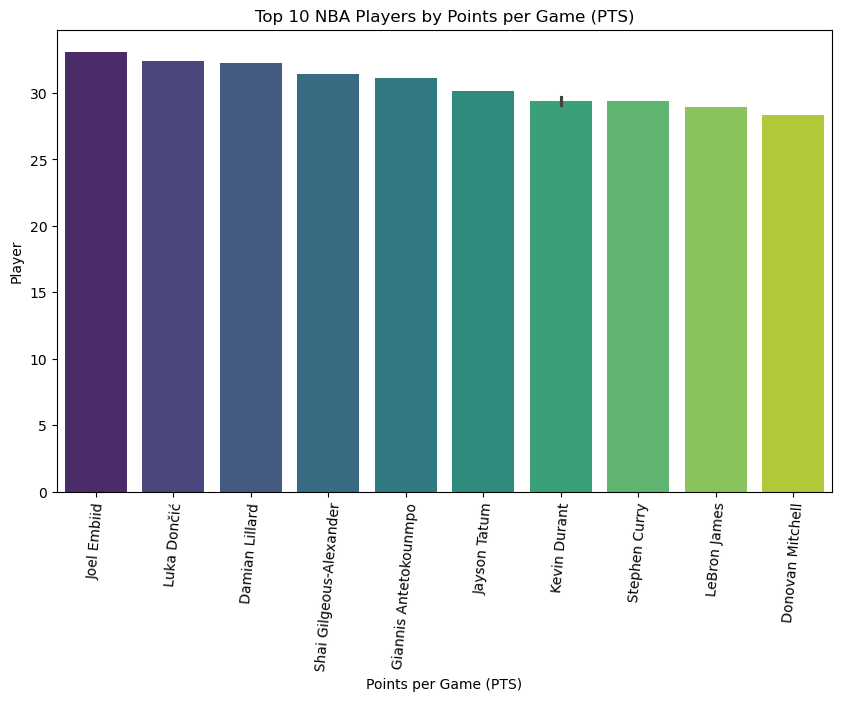

In [9]:
# Plotting the top 10 players based on Points per Game (PTS)
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='PTS', data=top10_players_ppg.head(11), palette='viridis')
plt.title('Top 10 NBA Players by Points per Game (PTS)')
plt.xlabel('Points per Game (PTS)')
plt.ylabel('Player')
plt.xticks(rotation=85)
plt.show()

/var/folders/hq/4zc23ktd6d5d8g4mygfzdn4h0000gn/T/ipykernel_13355/2412857908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='TRB', data=top10_players_reb.head(11), palette='magma')


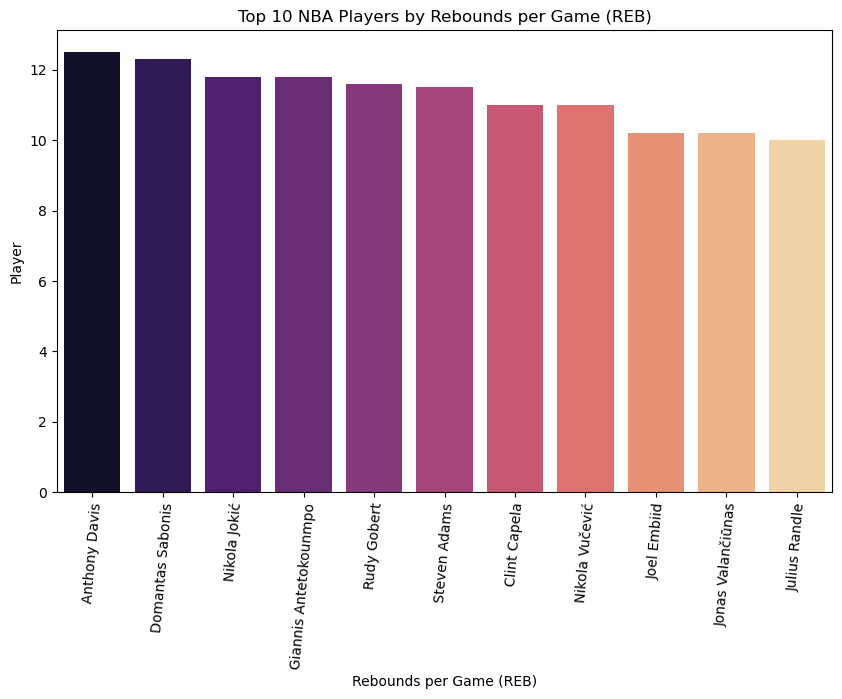

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='TRB', data=top10_players_reb.head(11), palette='magma')
plt.title('Top 10 NBA Players by Rebounds per Game (REB)')
plt.xlabel('Rebounds per Game (REB)')
plt.ylabel('Player')
plt.xticks(rotation=85)
plt.show()

/var/folders/hq/4zc23ktd6d5d8g4mygfzdn4h0000gn/T/ipykernel_13355/1638500175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='AST', data=top10_players_ast.head(11), palette='Blues')


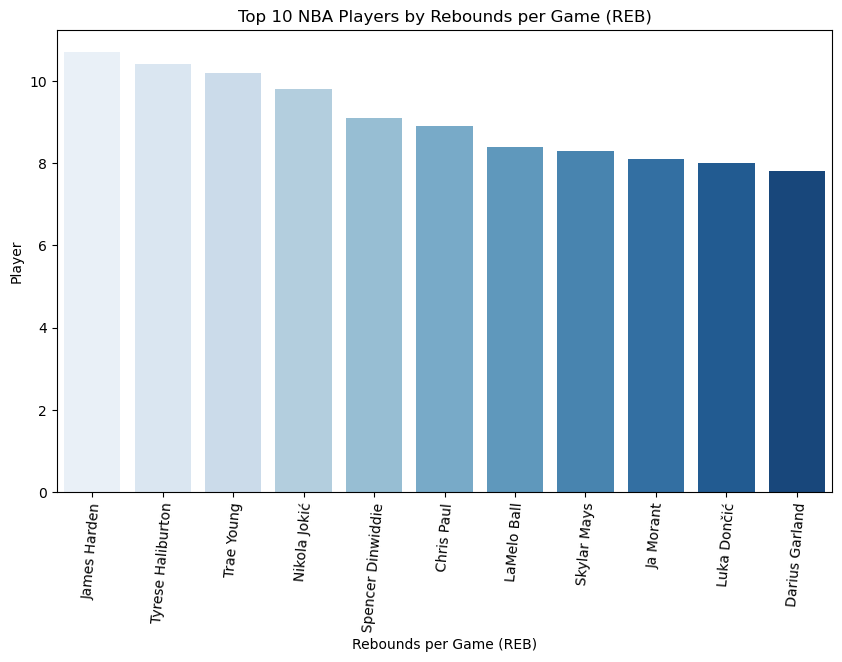

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='AST', data=top10_players_ast.head(11), palette='Blues')
plt.title('Top 10 NBA Players by Rebounds per Game (REB)')
plt.xlabel('Rebounds per Game (REB)')
plt.ylabel('Player')
plt.xticks(rotation=85)
plt.show()

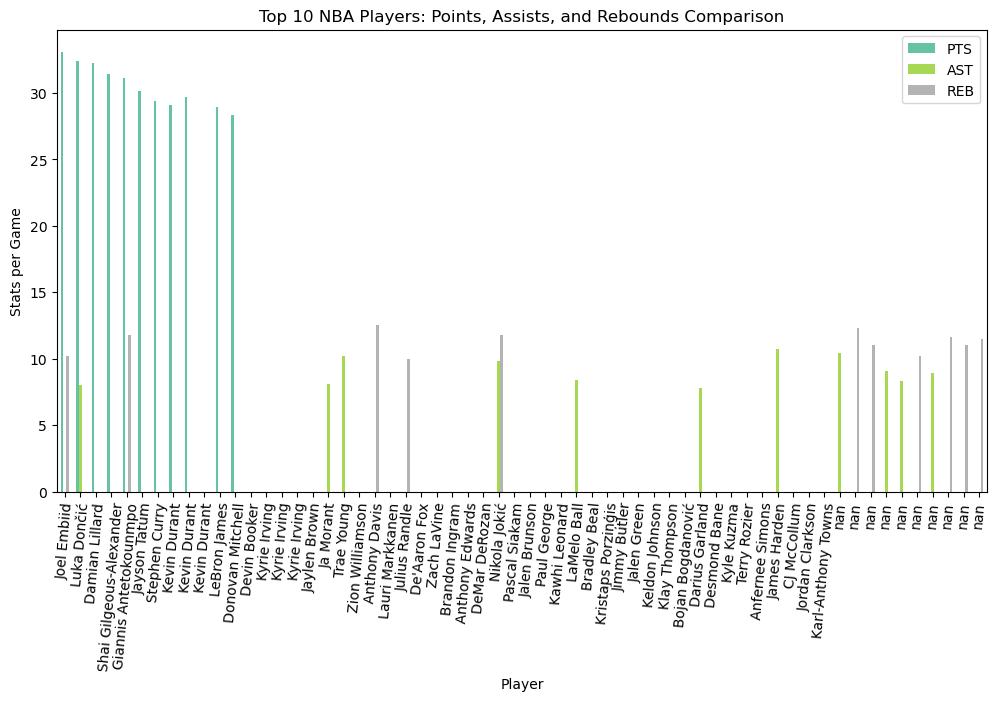

In [12]:
# create a dataframe that combines the top 10 players in each category
top_players_combined = pd.DataFrame({
    'Player': top50.head(50)['Player'],
    'PTS': top10_players_ppg.head(11)['PTS'],
    'AST': top10_players_ast.head(11)['AST'],
    'REB': top10_players_reb.head(11)['TRB']
})

# plotting the combined comparison
top_players_combined.set_index('Player').plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Top 10 NBA Players: Points, Assists, and Rebounds Comparison')
plt.ylabel('Stats per Game')
plt.xlabel('Player')
plt.xticks(rotation=85)
plt.show()


In [30]:
#create a scatter plot showing the correlation between points per game and minutes played to see if there’s a trend.
filter_ppg = nba_2023[['Player', 'PTS']]
filter_ppg

,Player,PTS
0,Joel Embiid,33.1
1,Luka Dončić,32.4
2,Damian Lillard,32.2
3,Shai Gilgeous-Alexander,31.4
4,Giannis Antetokounmpo,31.1
...,...,...
891,Wendell Moore Jr.,0.0
892,Jason Preston,0.0
893,Derrick Rose,0.0
894,Ricky Rubio,0.0


In [40]:
filter_min = nba_2023[['Player','MP']]
filter_min

,Player,MP
0,Joel Embiid,34.6
1,Luka Dončić,36.2
2,Damian Lillard,36.3
3,Shai Gilgeous-Alexander,35.5
4,Giannis Antetokounmpo,32.1
...,...,...
891,Wendell Moore Jr.,2.0
892,Jason Preston,1.0
893,Derrick Rose,3.0
894,Ricky Rubio,5.7


In [44]:
# merge data
merged_data = pd.merge(filter_ppg, filter_min, on='Player')
merged_data

,Player,PTS,MP
0,Joel Embiid,33.1,34.6
1,Joel Embiid,33.1,37.3
2,Luka Dončić,32.4,36.2
3,Damian Lillard,32.2,36.3
4,Shai Gilgeous-Alexander,31.4,35.5
...,...,...,...
1869,Derrick Rose,0.0,3.0
1870,Ricky Rubio,0.0,17.2
1871,Ricky Rubio,0.0,5.7
1872,Edmond Sumner,0.0,13.9


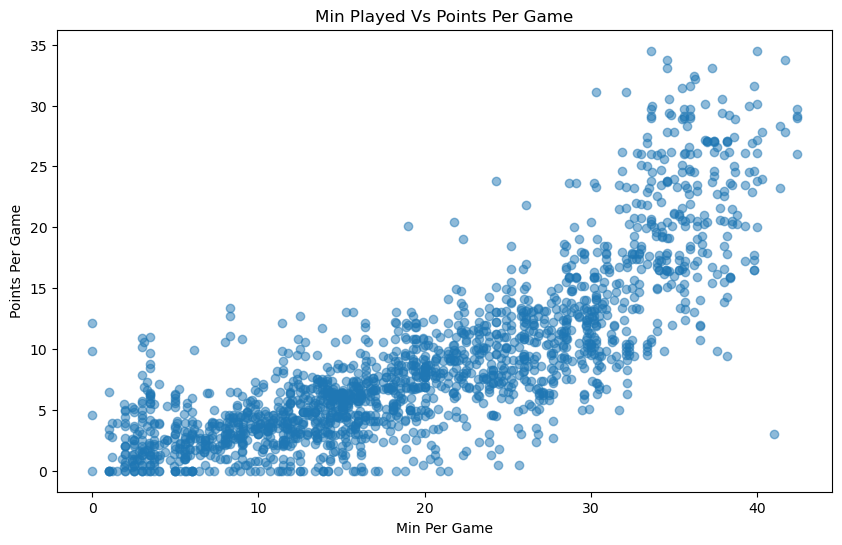

In [53]:
#plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['MP'], merged_data['PTS'], alpha = 0.5)
plt.title('Min Played Vs Points Per Game')
plt.xlabel('Min Per Game')
plt.ylabel('Points Per Game')
plt.show()


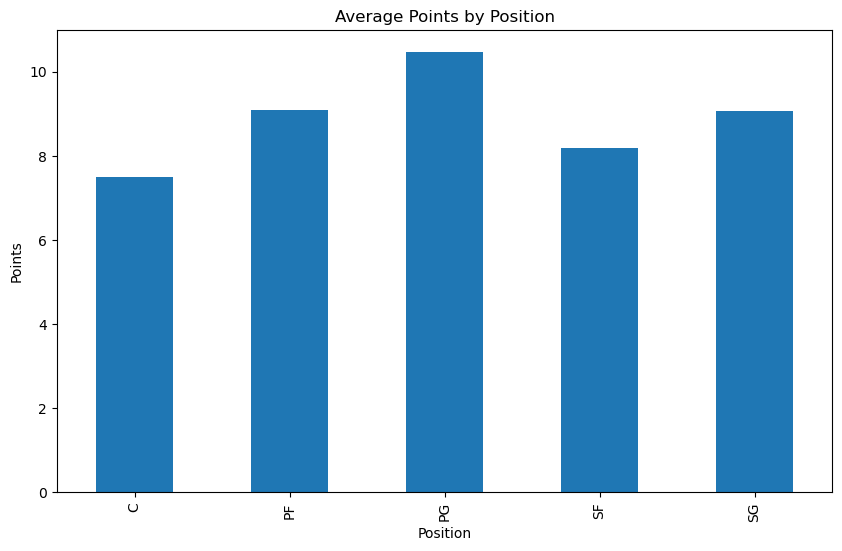

In [65]:
#position-wise analysis 
pos_ppg = nba_2023.groupby('Pos')['PTS'].mean()
pos_ppg
pos_ppg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Points by Position')
plt.xlabel('Position')
plt.ylabel('Points')
plt.show()